In [1]:
!pip install folium

In [2]:
import re
import matplotlib.pyplot as plt
import folium
import pandas as pd

In [3]:
file_path = '../hidden/flights.txt'

# Initialize an empty list to hold the first three lines
first_block_header = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()[:3]  # Read the first three lines

    for line in lines:
        first_block_header.append(line)

# Print the extracted first three lines
for header in first_block_header:
    print(header)

1/9/25, 1:44 PM Pairing(s) Report [Bid Period: FEB 2025]

7652 Check-In 05:20 Check-Out 11:12 Category SEA-220-A,B FEB 2025

+---------------------+



In [4]:
file_path = '../hidden/flights.txt'

# Initialize an empty list to hold the block headers
block_headers = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()
    
    inside_block = False  # Flag to indicate if we are inside a block
    block_header = []  # List to hold the current block of lines

    for line in lines:
        stripped_line = line.strip()
        
        if stripped_line.startswith("0"):  # Start of a block
            inside_block = True
            block_header = [line]  # Start a new block header
        elif inside_block:
            block_header.append(line)  # Add lines to the current block
        
        if stripped_line.endswith("F S |") and inside_block:  # End of a block
            block_headers.append(''.join(block_header))  # Save the block header
            inside_block = False  # Reset the flag

# Print the extracted block headers
for header in block_headers:
    print(header)

003:47TL 005:17 +---------------------+
TAFB 053:52 013:47TL
Total Credit 015:45
Carry Outs:
Date In Period Carry Out
7653 Check-In 05:20 Check-Out 11:07 Category SEA-220-A,B FEB 2025
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

003:07TL 004:37 |-- -- -- -- -- -- -- |
+---------------------+
TAFB 029:47 007:59TL
Total Credit 010:30
Carry Outs:
Date In Period Carry Out
7654 Check-In 05:20 Check-Out 11:07 Category SEA-220-A,B FEB 2025
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

003:07TL 004:37 |-- -- -- -- -- -- -- |
+---------------------+
TAFB 029:47 010:02TL
Total Credit 010:30
Carry Outs:
Date In Period Carry Out
7655 Check-In 05:20 Check-Out 12:11 Category SEA-220-A,B FEB 2025
+---------------------+
Day Flt Dep Arr Turn Eqp Block Duty | S M T W T F S |

003:11TL 004:41 |-- -- -- -- -- -- -- |
|-- -- -- -- -- -- -- |
TAFB 030:51 006:03TL |-- -- -- -- -- -- -- |
Total Credit 010:30 +---------------------+
Carry Outs

In [5]:
file_path = '../hidden/flights.txt'

# Initialize an empty list to hold the last block footer
last_block_footer = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()  # Read all lines from the file

# Iterate through the lines in reverse order to find the last instance of a line starting with "0"
for i in range(len(lines) - 1, -1, -1):  # Start from the last line and go to the first
    if lines[i].startswith("0"):  # Check if the line starts with "0"
        # Append this line and all subsequent lines to last_block_footer
        last_block_footer.extend(lines[i:])  # Use extend to add all lines from this point onward
        break  # Exit the loop after finding the last instance

# Print the extracted last block footer
for footer in last_block_footer:
    print(footer)  # Strip whitespace for cleaner output

003:54TL 005:24 |-- -- -- -- -- -- 15 |

|16 -- 18 19 -- -- 22 |

TAFB 034:34 007:59TL |-- -- 25 26 -- -- 01 |

Total Credit 015:45 +---------------------+

Carry Outs:

Date In Period Carry Out

Mar 1 004:05 011:40

about:blank 47/47



In [6]:
# Initialize lists for the two sections
flight_lines = []
layover_lines = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    lines = file.readlines()

# Now, process the lines excluding block headers and footers
for line in lines:
    # Check if the line is part of block headers or footers
    if (any(line in header for header in first_block_header) or 
        any(line in header for header in block_headers) or 
        any(line in header for header in last_block_footer)):  # Check if the line equals last_block_footer
        continue  # Skip this line if it's in block headers or footers
   
    # Categorize the remaining lines
    line = line.strip()  # Strip whitespace from the line
    first_three_chars = line[:3]  # Get the first three characters

    # Check if the first three characters are all uppercase letters
    if len(first_three_chars) == 3 and all(char.isupper() for char in first_three_chars):
        layover_lines.append(line)
    else:
        flight_lines.append(line)

# Print the results
print("Lines starting with a letter:")
for line in layover_lines:
    print(line)

print("\nOther lines:")
for line in flight_lines:
    print(line)

Lines starting with a letter:
SNA 020:48 RENAISSANCE NEWPORT 002:52TL 004:22 | -- -- |
ANC 013:24 HOTEL CAPTAIN COOK 007:08TL 010:01 |-- -- -- -- -- -- -- |
SNA 013:32 RENAISSANCE NEWPORT 004:52TL 011:38 |-- 10 -- -- -- -- -- |
SNA 013:32 RENAISSANCE NEWPORT 006:55TL 011:38 |-- -- -- -- -- -- -- |
SNA 021:48 RENAISSANCE NEWPORT 002:52TL 004:22 | -- -- |
SNA 020:18 RENAISSANCE NEWPORT 002:52TL 004:22 | -- -- |
DCA 018:25 HYATT CENTRIC ALEXAN 005:00TL 006:30 | -- 01 |
IAH 013:21 HILTON AMERICAS 004:24TL 008:19 |-- -- -- -- -- -- -- |
SFO 016:13 WESTIN ST. FRANCIS 005:42TL 008:12
IAD 023:25 HYATT RESTON 005:00TL 006:30 | -- -- |
DCA 018:25 HYATT CENTRIC ALEXAN 005:00TL 006:30 | -- -- |
LGA 015:21 GRAND HYATT 006:24TL 011:54 |-- -- -- -- -- -- -- |
ORD 013:36 HYATT REGENCY O HARE 000:00TL 004:19
IAD 023:43 HYATT RESTON 005:00TL 006:30 | -- -- |
ORD 016:35 PALMER HOUSE 004:05TL 005:35 | -- -- |
SFO 016:13 WESTIN ST. FRANCIS 006:01TL 008:37 |-- -- -- 19 20 -- -- |
ORD 016:35 PALMER HOUSE 004

In [7]:
import re  # Import the regular expressions module

# Function to find all groups of three capitalized letters in the provided lines
def find_airport_stops(flight_lines):
    airports = []

    for line in flight_lines:
        # Find groups of three capitalized letters in the line
        groups = re.findall(r'\b[A-Z]{3}\b', line)
        airports.extend(groups)  # Add found groups to the airports list
    return airports

airport_stops = find_airport_stops(flight_lines)
print(airport_stops)

['SEA', 'SNA', 'SNA', 'SEA', 'SEA', 'ANC', 'ANC', 'SEA', 'SEA', 'SNA', 'SNA', 'SLC', 'SLC', 'SNA', 'SNA', 'SEA', 'SEA', 'SNA', 'SNA', 'SLC', 'SLC', 'SNA', 'SNA', 'SEA', 'SEA', 'SNA', 'SNA', 'SEA', 'SEA', 'SNA', 'SNA', 'SLC', 'SLC', 'GEG', 'GEG', 'SEA', 'SEA', 'IAD', 'DCA', 'LGA', 'LGA', 'IAH', 'IAH', 'SLC', 'SLC', 'SJC', 'SFO', 'SEA', 'SEA', 'IAD', 'IAD', 'SEA', 'SEA', 'IAD', 'DCA', 'LGA', 'LGA', 'MCI', 'MCI', 'LGA', 'LGA', 'ORD', 'ORD', 'SEA', 'SEA', 'IAD', 'IAD', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SJC', 'SFO', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SFO', 'SFO', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SFO', 'SFO', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SFO', 'SFO', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SJC', 'SFO', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SJC', 'SFO', 'SEA', 'SEA', 'PHX', 'PHX', 'SEA', 'SEA', 'ORD', 'ORD', 'SEA', 'SEA', 'ORD', 'ORD', 'LGA', 'EWR', 'ATL', 'ATL', 'IAD', 'IAD', 'SEA', 'SEA', 'ORD', 'ORD', 'SLC', 'SLC', 'SFO', 'SFO', 'SEA', 'SEA'

In [8]:
# Function to return the first three characters of each line in the provided lines
def find_first_airport_stop(layover_lines):
    airports = []
    
    for line in layover_lines:
        # Get the first three characters of the line
        first_three_chars = line[:3]  # Slicing to get the first three characters
        airports.append(first_three_chars)  # Add to the airports list
    
    return airports

airport_layovers = find_first_airport_stop(layover_lines)
print(airport_layovers)

['SNA', 'ANC', 'SNA', 'SNA', 'SNA', 'SNA', 'DCA', 'IAH', 'SFO', 'IAD', 'DCA', 'LGA', 'ORD', 'IAD', 'ORD', 'SFO', 'ORD', 'SFO', 'ORD', 'SFO', 'ORD', 'SFO', 'ORD', 'SFO', 'ORD', 'SFO', 'ORD', 'EWR', 'IAD', 'ORD', 'SFO', 'ORD', 'BOI', 'SNA', 'ORD', 'SFO', 'IAD', 'SNA', 'SNA', 'ANC', 'SNA', 'ANC', 'SNA', 'ANC', 'LAX', 'SFO', 'SNA', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'ANC', 'DEN', 'MSP', 'SNA', 'DFW', 'DEN', 'JFK', 'DFW', 'DEN', 'MSP', 'SAT', 'SNA', 'SNA', 'TUS', 'DEN', 'SFO', 'SNA', 'SNA', 'DEN', 'TUS', 'SNA', 'IDA', 'SNA', 'ANC', 'ANC', 'SAT', 'SFO', 'BWI', 'SNA', 'BWI', 'SAT', 'SNA', 'BWI', 'IAD', 'GEG', 'SFO', 'ANC', 'GEG', 'DEN', 'SFO', 'ANC', 'SFO', 'ANC', 'SFO', 'SBA', 'DFW', 'GEG', 'ANC', 'SBA', 'DEN', 'SJC', 'MKE', 'SNA', 'SFO', 'SJC', 'MKE', 'SNA', 'SNA', 'BWI', 'SNA', 'SNA', 'DFW', 'SFO', 'SNA', 'SNA', 'SJC', 'SNA', 'DFW', 'SFO', 'SNA', 'BWI', 'SJC', 'SJC', 'SFO', 'SFO', 'DFW', 'ORD', 'SBA', 'IAH', 'ORD', 'ANC', 'BUR', 'ANC', 'DFW', 'SAT', 'SNA'

In [9]:
from collections import Counter

In [10]:
# Count instances of each string
stops_summary = Counter(airport_stops)

# Print the summary
print(stops_summary)

Counter({'SEA': 562, 'SLC': 234, 'MSP': 164, 'SNA': 161, 'ANC': 116, 'SFO': 114, 'DFW': 112, 'ORD': 102, 'LGA': 90, 'DEN': 52, 'SJC': 45, 'TUS': 40, 'MCI': 36, 'ATL': 32, 'BWI': 32, 'IAH': 30, 'SAT': 26, 'MKE': 22, 'FAI': 20, 'IAD': 19, 'SBA': 18, 'JFK': 17, 'OAK': 17, 'GEG': 14, 'SAN': 14, 'EWR': 11, 'BUR': 11, 'MSY': 6, 'IDA': 4, 'STL': 4, 'SRQ': 4, 'DCA': 3, 'PHX': 2, 'BOI': 2, 'BOS': 2, 'PHL': 2, 'LAX': 1, 'ONT': 1})


In [11]:
# Get the counts sorted from highest to lowest
sorted_stops = stops_summary.most_common()

In [12]:
# Prepare data for plotting
stops_labels, stops_counts = zip(*sorted_stops)  # Unzip the sorted counts into labels and counts

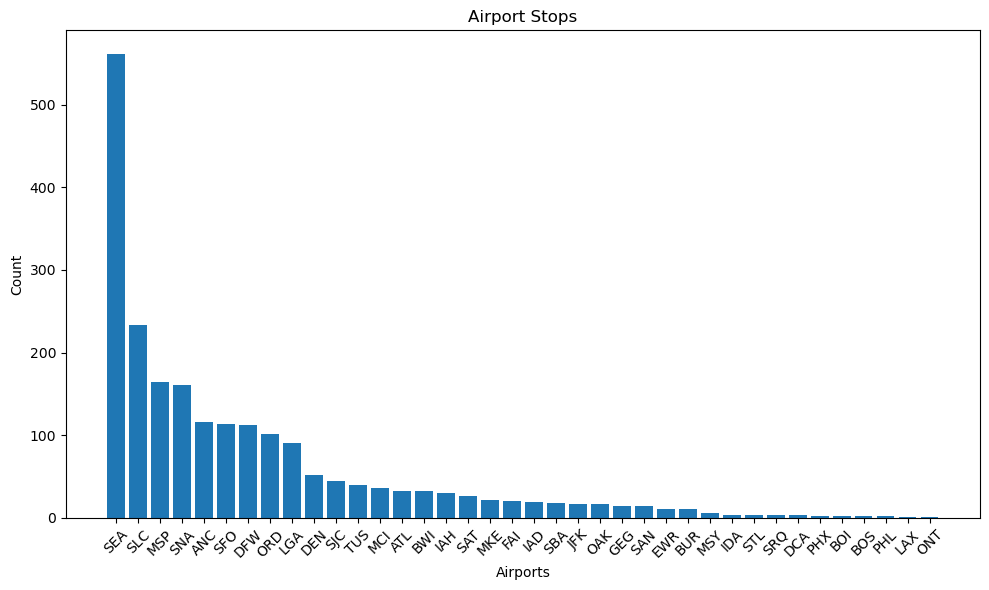

In [13]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(stops_labels, stops_counts)
plt.xlabel('Airports')
plt.ylabel('Count')
plt.title('Airport Stops')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Adjust layout to make room for rotated labels
# Save the plot
plt.savefig('../dist/airport_stops.png')  # Save as a PNG file
plt.show()

In [14]:
# Count instances of each string
airport_layovers_summary = Counter(airport_layovers)

# Print the summary
print(airport_layovers_summary)

Counter({'SNA': 64, 'ANC': 57, 'ORD': 50, 'DFW': 48, 'SFO': 45, 'DEN': 26, 'LGA': 18, 'MCI': 17, 'BWI': 16, 'SJC': 16, 'IAH': 13, 'MSP': 13, 'SAT': 13, 'BUR': 10, 'FAI': 10, 'SBA': 9, 'MKE': 9, 'IAD': 8, 'GEG': 6, 'EWR': 4, 'DCA': 3, 'TUS': 2, 'IDA': 2, 'STL': 2, 'BOI': 1, 'LAX': 1, 'JFK': 1, 'OAK': 1, 'SAN': 1, 'ONT': 1})


In [15]:
# Get the counts sorted from highest to lowest
airport_layovers_counts = airport_layovers_summary.most_common()
# Prepare data for plotting
layover_labels, layover_counts = zip(*airport_layovers_counts)  # Unzip the sorted counts into labels and counts

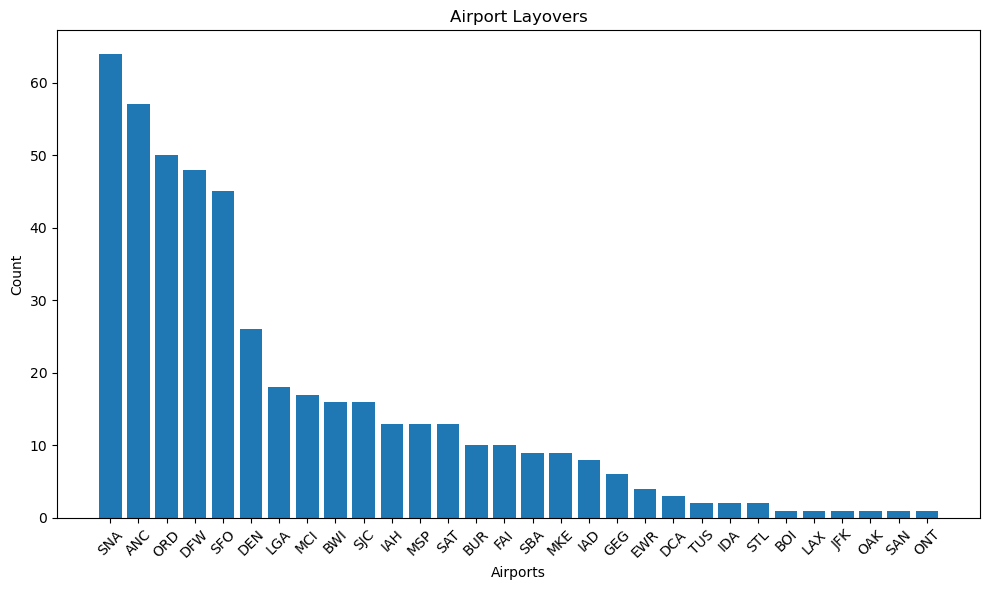

In [16]:
# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.bar(layover_labels, layover_counts)
plt.xlabel('Airports')
plt.ylabel('Count')
plt.title('Airport Layovers')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.tight_layout()  # Adjust layout to make room for rotated labels

# Save the plot
plt.savefig('../dist/airport_layover.png')  # Save as a PNG file
plt.show()

In [17]:
# Load the OpenFlights airports data
url = 'https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat'
columns = ['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone', 'Type', 'Source']
airports_df = pd.read_csv(url, header=None, names=columns)

# Filter for relevant columns (IATA, Latitude, Longitude)
airport_locations = airports_df[['IATA', 'Name', 'Latitude', 'Longitude']]

# Display the first few rows
print(airport_locations.head())

  IATA                                         Name  Latitude   Longitude
0  GKA                               Goroka Airport -6.081690  145.391998
1  MAG                               Madang Airport -5.207080  145.789001
2  HGU                 Mount Hagen Kagamuga Airport -5.826790  144.296005
3  LAE                               Nadzab Airport -6.569803  146.725977
4  POM  Port Moresby Jacksons International Airport -9.443380  147.220001


In [18]:
# Convert custom airports to DataFrame
stops_airports_df = pd.DataFrame(list(stops_summary.items()), columns=['IATA', 'Count'])
print(stops_airports_df.head())

  IATA  Count
0  SEA    562
1  SNA    161
2  ANC    116
3  SLC    234
4  GEG     14


In [19]:
# Merge the custom airports with the OpenFlights data to get lat/long
stops_merged_data = pd.merge(stops_airports_df, airport_locations, on='IATA', how='left')
print(stops_merged_data.head())

  IATA  Count                                         Name   Latitude  \
0  SEA    562         Seattle Tacoma International Airport  47.449001   
1  SNA    161     John Wayne Airport-Orange County Airport  33.675701   
2  ANC    116  Ted Stevens Anchorage International Airport  61.174400   
3  SLC    234         Salt Lake City International Airport  40.788399   
4  GEG     14                Spokane International Airport  47.619900   

    Longitude  
0 -122.308998  
1 -117.867996  
2 -149.996002  
3 -111.977997  
4 -117.533997  


In [20]:
# Initialize a Folium map centered around the average location
map_center = (39.8283, -98.5795)  # Center of the continental US
airport_map = folium.Map(location=map_center, zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Airport Stops Map</b></h3>
             '''
airport_map.get_root().html.add_child(folium.Element(title_html))

# Add markers to the map
for _, row in stops_merged_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 5,  # Scale the size of the marker
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['IATA']}: {row['Name']}: {row['Count']}",
        tooltip=row['IATA']  # Tooltip with IATA code
    ).add_to(airport_map)

# Save the map to an HTML file
airport_map.save("../dist/airport_stops_map.html")

# Display the map
airport_map

In [21]:
# Convert custom airports to DataFrame
layover_airports_df = pd.DataFrame(list(airport_layovers_summary.items()), columns=['IATA', 'Count'])
print(layover_airports_df.head())

  IATA  Count
0  SNA     64
1  ANC     57
2  DCA      3
3  IAH     13
4  SFO     45


In [22]:
# Merge the custom airports with the OpenFlights data to get lat/long
layover_data = pd.merge(layover_airports_df, airport_locations, on='IATA', how='left')
print(layover_data.head())

  IATA  Count                                          Name   Latitude  \
0  SNA     64      John Wayne Airport-Orange County Airport  33.675701   
1  ANC     57   Ted Stevens Anchorage International Airport  61.174400   
2  DCA      3     Ronald Reagan Washington National Airport  38.852100   
3  IAH     13  George Bush Intercontinental Houston Airport  29.984400   
4  SFO     45           San Francisco International Airport  37.618999   

    Longitude  
0 -117.867996  
1 -149.996002  
2  -77.037697  
3  -95.341400  
4 -122.375000  


In [23]:
nan_data = layover_data[layover_data.isna().any(axis=1)]
print(nan_data)

Empty DataFrame
Columns: [IATA, Count, Name, Latitude, Longitude]
Index: []


In [24]:
# Initialize a Folium map centered around the average location
map_center = (39.8283, -98.5795)  # Center of the continental US
layover_map = folium.Map(location=map_center, zoom_start=4)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Airport Layover Map</b></h3>
             '''
layover_map.get_root().html.add_child(folium.Element(title_html))

# Add markers to the map
for _, row in layover_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=row['Count'] / 1,  # Scale the size of the marker
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['IATA']}: {row['Name']}: {row['Count']}",
        tooltip=row['IATA']  # Tooltip with IATA code
    ).add_to(layover_map)

# Save the map to an HTML file
layover_map.save("../dist/airport_layover_map.html")

# Display the map
layover_map